In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patheffects
from matplotlib import patches
from mplsoccer import FontManager, add_image, VerticalPitch
import matplotlib.image as mpimg
from PIL import Image
import matplotlib as mpl
from highlight_text import fig_text, ax_text
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
def adjustFigAspect(fig,aspect=1):
    '''
    Adjust the subplot parameters so that the figure has the correct
    aspect ratio.
    '''
    xsize,ysize = fig.get_size_inches()
    minsize = min(xsize,ysize)
    xlim = .4*minsize/xsize
    ylim = .4*minsize/ysize
    if aspect < 1:
        xlim *= aspect
    else:
        ylim /= aspect
    fig.subplots_adjust(left=.5-xlim,
                        right=.5+xlim,
                        bottom=.5-ylim,
                        top=.5+ylim)

In [3]:
font_normal = FontManager((
    "https://github.com/Slothfulwave612/data/blob/master/fonts/Basier%20Circle/BasierCircle-Regular.ttf?raw=true"
))
font_bold = FontManager((
    "https://github.com/Slothfulwave612/data/blob/master/fonts/Basier%20Circle/BasierCircle-Bold.ttf?raw=true"
))
font_medium = FontManager((
    "https://github.com/Slothfulwave612/data/blob/master/fonts/Basier%20Circle/BasierCircle-Medium.ttf?raw=true"
))
font_italic = FontManager("https://github.com/Slothfulwave612/data/blob/master/fonts/Basier%20Circle/BasierCircle-Italic.ttf?raw=true")

In [4]:
font_italic = FontManager("https://github.com/google/fonts/blob/main/ofl/notoserif/NotoSerif-Italic.ttf?raw=true")
# font_quote = FontManager("https://github.com/google/fonts/blob/main/ofl/notoserif/NotoSerif-Regular.ttf?raw=true")

In [5]:
# font_main = FontManager("https://github.com/google/fonts/blob/main/ofl/frederickathegreat/FrederickatheGreat-Regular.ttf?raw=true")

In [5]:
def imscatter(x, y, image, ax=None, zoom=1, **kwargs):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom, **kwargs)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

## Performance

In [6]:
def get_length(max_range, min_range, values, length):
    label_range = np.abs(max_range - min_range)
    range_min = np.minimum(min_range, max_range)
    range_max = np.maximum(min_range, max_range)
    values_clipped = np.minimum(np.maximum(values, range_min), range_max)
    proportion = np.abs(values_clipped - min_range) / label_range
    vertices = (proportion * length)
    
    return vertices

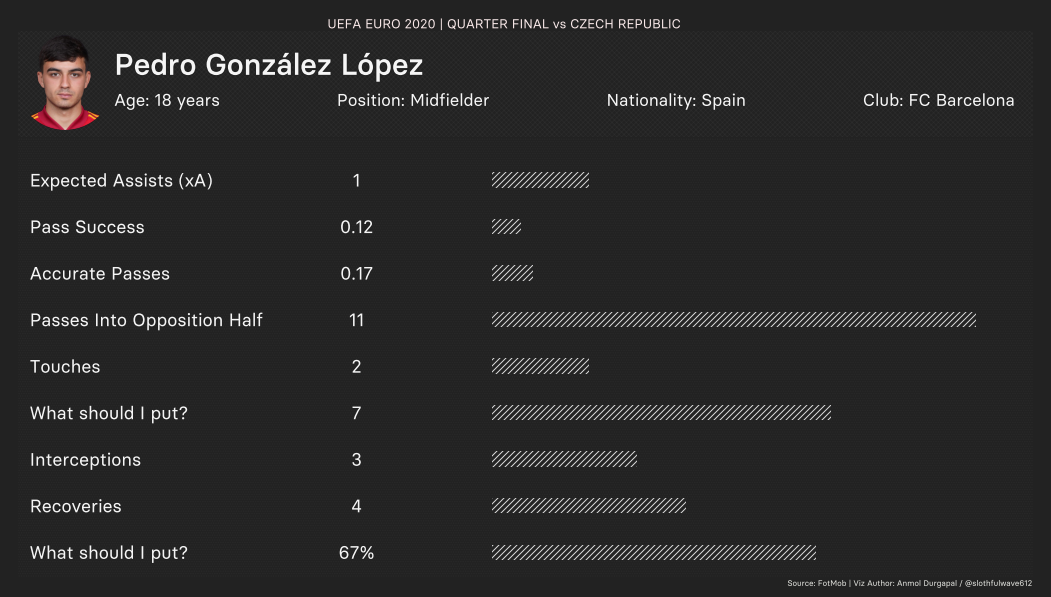

In [12]:
### colors
background_color = "#222222"
text_color = "#F5F5F5"
line_color = "#99A8A3"
patch_color = "#888888"

# create a subplot
fig, ax = plt.subplots(
    facecolor=background_color, figsize=(20,18)
)
ax.set_facecolor(background_color)

# adjust fig
adjustFigAspect(fig, 16/9)


def make_table(ax):
    """
    Function to make table
    
    Args:
        ax : axes.Axes
        axes object.
    """
    # coordinates lines
    x_lines = [
#         (42.7, 42.7), (53.3, 53.3), (42.7, 53.3),  # season-box
        (5, 95)         # name-box
    ]
    
    y_lines = [
#         (90, 93), (90, 93), (93, 93),      # season-box
        (73, 73)     # top-box
    ]
    
    # plot lines
    for x, y in zip(x_lines, y_lines):
        ax.plot(
            x, y, lw=1, color="#222222",
        )

make_table(ax)

space = 7

# text
texts = [
    {
        'x': 48, 'y': 90.5, 's': "UEFA EURO 2020 | QUARTER FINAL vs CZECH REPUBLIC",
        "ha": "center", "color": "#F9E9E9",
        "fontsize": 13, "fontproperties": font_normal.prop,
        "path_effects": [
            patheffects.withStroke(linewidth=2, foreground=background_color),
        ]
    },
    {
        'x': 13.5, 'y': 83, 's': "Pedro González López", "color": text_color,
        "fontsize": 30, "fontproperties": font_medium.prop,
        "path_effects": [patheffects.withStroke(linewidth=2, foreground=background_color)]
    },
    {
        'x': 13.5, 'y': 78, 's': "Age: 18 years"+"\t"*space+" Position: Midfielder"+"\t"*space+" Nationality: Spain"+"\t"*space+" Club: FC Barcelona", "color": text_color,
        "fontsize": 17, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 6, 'y': 65, 's': "Expected Assists (xA)", "color": text_color,
        "fontsize": 18, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 6, 'y': 57.5, 's': "Pass Success", "color": text_color,
        "fontsize": 18, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 6, 'y': 50, 's': "Accurate Passes", "color": text_color,
        "fontsize": 18, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 6, 'y': 42.5, 's': "Passes Into Opposition Half", "color": text_color,
        "fontsize": 18, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 6, 'y': 35, 's': "Touches", "color": text_color,
        "fontsize": 18, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 6, 'y': 27.5, 's': "What should I put?", "color": text_color,
        "fontsize": 18, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 6, 'y': 20, 's': "Interceptions", "color": text_color,
        "fontsize": 18, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 6, 'y': 12.5, 's': "Recoveries", "color": text_color,
        "fontsize": 18, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 6, 'y': 5, 's': "What should I put?", "color": text_color,
        "fontsize": 18, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 35, 'y': 65, 's': "1", "color": text_color,
        "fontsize": 18, "fontproperties": font_normal.prop, "ha": "center",
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 35, 'y': 57.5, 's': "0.12", "color": text_color,
        "fontsize": 18, "fontproperties": font_normal.prop, "ha": "center",
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 35, 'y': 50, 's': "0.17", "color": text_color,
        "fontsize": 18, "fontproperties": font_normal.prop, "ha": "center",
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 35, 'y': 42.5, 's': "11", "color": text_color,
        "fontsize": 18, "fontproperties": font_normal.prop, "ha": "center",
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 35, 'y': 35, 's': "2", "color": text_color,
        "fontsize": 18, "fontproperties": font_normal.prop, "ha": "center",
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 35, 'y': 27.5, 's': "7", "color": text_color,
        "fontsize": 18, "fontproperties": font_normal.prop, "ha": "center",
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 35, 'y': 20, 's': "3", "color": text_color,
        "fontsize": 18, "fontproperties": font_normal.prop, "ha": "center",
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 35, 'y': 12.5, 's': "4", "color": text_color,
        "fontsize": 18, "fontproperties": font_normal.prop, "ha": "center",
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 35, 'y': 5, 's': "67%", "color": text_color,
        "fontsize": 18, "fontproperties": font_normal.prop, "ha": "center",
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
]


for t in texts:
    ax.text(**t)


rect_xy = [ 
    (42.7, 90),   # season rect
    (5, 73),      # name rect
    (5, 73),      # name rect
    (5, 2),       # stats rect
]

rect_width = [
    10.6, 90, 90, 90,
    
]

rect_height = [
    3, 17, 17, 71
]

rect_alpha = [
    0.06, 0.03, 0.03, 0.03
]

rect_hatch = [
    '', 5*'\\', 5*'/', 5*'.'
]


for xy, width, height, alpha, hatch in zip(rect_xy, rect_width, rect_height, rect_alpha, rect_hatch):
    rect = plt.Rectangle(
        xy=xy, width=width, height=height, ec="#F8F8F8", alpha=alpha, fc="None", hatch=hatch, lw=0
    )
    ax.add_patch(rect)


# main rectangles
rect_xy = [
    (47, 64.8), (47, 57.3), (47, 49.8),
    (47, 42.3), (47, 34.8), (47, 27.3),
    (47, 19.8), (47, 12.3), (47, 4.8), 
]

min_values = [
    0, 0, 0, 0, 0, 0, 0, 0, 0
]

max_values = [
    5, 2, 2, 10, 10, 10, 10, 10, 100
]

values = [
    1, 0.12, 0.17, 11, 2, 7, 3, 4, 67
]

colors = ["#65adff"] * 4 +  ["#ffc766"] * 4 + ["#ff6565"] * 1

mpl.rcParams['hatch.linewidth'] = 1

for xy, min_val, max_val, val, col in zip(rect_xy, min_values, max_values, values, colors):
    length = get_length(max_val, min_val, val, 43)
    
    rect = plt.Rectangle(
        xy=xy, width=length, height=2.5, ec="gainsboro", fc="None", hatch=4*'/', lw=0,
    )
    ax.add_patch(rect)

_ = add_image(Image.open("../pic/pedri.png"), fig, 0.145, 0.63, 0.07, 0.075)
    
# set axis
ax.set(xlim=(4,96), ylim=(0,94))

fig.text(
    0.852, 0.278, "Source: FotMob | Viz Author: Anmol Durgapal / @slothfulwave612",
    size=8, fontproperties=font_normal.prop, color="#EBECE7", ha="right",
    path_effects=[patheffects.withStroke(linewidth=1, foreground=background_color)]
)

ax.axis("off")
fig.savefig("../plots/15_chesia.jpg", dpi=500, bbox_inches="tight", pad_inches=0)

## Scoreline

In [328]:
barca = [47, 50, 67, 72, 82]
barca_players = ["Ronaldo", "Ronaldo", "Figo", "Ronaldo", "Pizzi"]

ath = [9, 28, 31, 51]
ath_players = ["Pantić", "Pantić", "Pantić", "Pantić"]

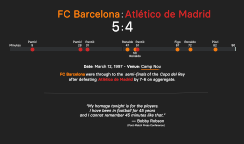

In [335]:
# colors
background_color = "#222222"
text_color = "#F8F8F8"
line_color = "#99A8A3"

# create a subplot
fig, ax = plt.subplots(
    facecolor=background_color, figsize=(10,4)
)
ax.set_facecolor(background_color)

# adjust fig
adjustFigAspect(fig, 16/9)

# full bar and half time
rect = plt.Rectangle(
    xy=(0,1.92), width=90, height=0.15, zorder=2, fc="#2E3032"
)
ax.add_patch(rect)
rect = plt.Rectangle(
    xy=(45,1.92), width=0.2, height=0.15, zorder=2, fc=background_color
)
ax.add_patch(rect)

# 0 and 90
rect = plt.Rectangle(
    xy=(0,1.92), width=0.2, height=0.15, zorder=2, fc=line_color
)
ax.add_patch(rect)
rect = plt.Rectangle(
    xy=(90,1.92), width=0.2, height=0.15, zorder=2, fc=line_color
)
ax.add_patch(rect)

# add for barca
for i, j in zip(barca, barca_players):
    ax.scatter(i, 1.995, s=8, zorder=3, color="#ff7f0e")
    
    if i == 50:
        y = 1.83
        y_2 = 1.715
    else:
        y = 2.13
        y_2 = 2.26
    
    text = {
        'x': i, "color": text_color, 
        "ha": "center", "va": "center", "fontsize": 3, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=0.1, foreground=background_color)]
    }
    
    ax.text(y=y, s=i, **text)
    ax.text(y=y_2, s=j, **text)

# add for ath
for i, j in zip(ath, ath_players):
    ax.scatter(i, 1.995, s=8, zorder=3, color="#d62728")
    
    text = {
        "color": text_color, 
        "ha": "center", "va": "center", "fontsize": 3, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=0.1, foreground=background_color)]
    }
    
    ax.text(x=i, y=2.13, s=int(i), **text)
    
    if i == 31:
        i += 1
    elif i == 28:
        i -= 1
    elif i == 51:
        i += 1
        
    ax.text(x=i, y=2.26, s=j, **text)
    
# title, sub-title and credits --> list containing dict of values for text method
text_values = [
    {
        'x': -0.1, 'y': 2.13, 's': "Minutes", "color": "#E8E8E8", 
        "va": "center", "fontsize": 3, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=0.000001, foreground=background_color)]
    },
    {
        'x': 90.1, 'y': 2.13, 's': "90", "color": text_color, 
        "ha": "right", "va": "center", "fontsize": 3, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=0.00001, foreground=background_color)]
    },
    {
        'x': 44, 'y': 3.3, 's': "FC Barcelona", "color": "#ff7f0e", 
        "ha": "right", "va": "center", "fontsize": 10, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=0.000001, foreground=background_color)]
    },
    {
        'x': 46, 'y': 3.3, 's': "Atlético de Madrid", "color": "#d62728", 
        "ha": "left", "va": "center", "fontsize": 10, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=0.00001, foreground=background_color)]
    },
    {
        'x': 44, 'y': 2.8, 's': "5", "color": text_color, 
        "ha": "right", "va": "center", "fontsize": 14, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=0.00001, foreground=background_color)]
    },
    {
        'x': 45, 'y': 2.8, 's': ":", "color": text_color, 
        "ha": "center", "va": "center", "fontsize": 10, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=0.00001, foreground=background_color)]
    },
    {
        'x': 45, 'y': 3.3, 's': ":", "color": "#A0A0A0", 
        "ha": "center", "va": "center", "fontsize": 10, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=0.00001, foreground=background_color)]
    },
    {
        'x': 46, 'y': 2.8, 's': "4", "color": text_color, 
        "ha": "left", "va": "center", "fontsize": 14, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=0.00001, foreground=background_color)]
    },
    {
        'x': 45, 'y': -0.4, 's': '“My homage tonight is for the players.\nI have been in football for 45 years\nand I cannot remember 45 minutes like that.”', "color": text_color, 
        "ha": "center", "va": "center", "fontsize": 4, "fontproperties": font_italic.prop,
        "path_effects": [patheffects.withStroke(linewidth=0.00001, foreground=background_color)]
    },
    {
        'x': 61.8, 'y': -0.8, 's': "— Bobby Robson", "color": text_color, 
        "ha": "right", "va": "center", "fontsize": 4, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=0.00001, foreground=background_color)]
    },
    {
        'x': 61.8, 'y': -0.95, 's': "(Post-Match Press Conference)", "color": text_color, 
        "ha": "right", "va": "center", "fontsize": 2.5, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=0.00001, foreground=background_color)]
    },
]

for text in text_values:
    ax.text(**text)

    
# highlight text
text = {
    'x': 45, 'y': 1.3, 's': "<Date>: March 12, 1997 - <Venue>: <Camp Nou>", "color": text_color, "ax": ax,
    "ha": "center", "va": "center", "fontsize": 4, "fontproperties": font_normal.prop,
    "path_effects": [patheffects.withStroke(linewidth=0.01, foreground=background_color)],
    "highlight_textprops": [
        {"fontproperties": font_medium.prop},
        {"fontproperties": font_medium.prop},
        {"fontsize": 4},
    ]
}

title = ax_text(**text)

title.make_highlight_insets([False, True, True])
insets = title.highlight_axes

insets[2].plot(np.arange(0, 1, 0.1),
                   [0.05, 0.0, 0, 0.05, 0.1, 0.05, 0.1, 0.1, 0.5, 0.85],
                   color='#ff7f0e', lw=0.6)

insets[2].set_position(
    [0.525, 0.508, 0.03, 0.004]
)


# highlight text
text = {
    'x': 45, 'y': 1, 's': "<FC Barcelona> were through to the <semi-finals> of the <Copa del Rey>", "color": text_color, "ax": ax,
    "ha": "center", "va": "center", "fontsize": 4, "fontproperties": font_normal.prop,
    "path_effects": [patheffects.withStroke(linewidth=0.0001, foreground=background_color)],
    "highlight_textprops": [
        {"color": "#ff7f0e", "fontproperties": font_medium.prop},
        {"fontproperties": font_italic.prop},
        {"fontproperties": font_italic.prop},
#         {"color": "#d62728", "fontproperties": font_medium.prop}
    ]
}

title = ax_text(**text)

text = {
    'x': 45, 'y': 0.8, 's': "after defeating <Atlético de Madrid> by 7-6 on aggeregate.", "color": text_color, "ax": ax,
    "ha": "center", "va": "center", "fontsize": 4, "fontproperties": font_normal.prop,
    "path_effects": [patheffects.withStroke(linewidth=0.0001, foreground=background_color)],
    "highlight_textprops": [
        {"color": "#d62728", "fontproperties": font_medium.prop}
    ]
}

title = ax_text(**text)

insets[1].plot(np.arange(0, 1, 0.1),
                   [0.5, 0.15, 0.15, 0.15, 0.1, 0.05, 0.15, 0.15, 0.8, 0.85],
                   color='#444444', lw=0.5, alpha=0.8)

insets[1].set_position(
    [0.38, 0.425, 0.25, 0.004]
)


ax.set(xlim=(-1,91), ylim=(-1.4,3.6))
ax.axis("off")

fig.savefig("../plots/08_ath_madrid.jpg", dpi=2000, bbox_inches="tight", pad_inches=0)

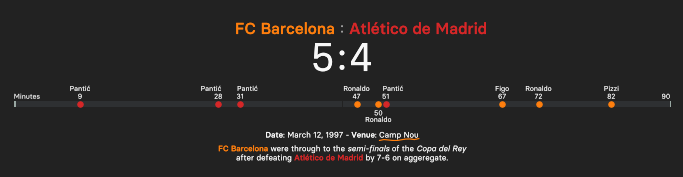

In [623]:
# colors
background_color = "#222222"
text_color = "#F8F8F8"
line_color = "#99A8A3"

# create a subplot
fig, ax = plt.subplots(
    facecolor=background_color, figsize=(12,3)
)
ax.set_facecolor(background_color)

# adjust fig
# adjustFigAspect(fig, 16/9)

# full bar and half time
rect = plt.Rectangle(
    xy=(0,1.92), width=90, height=0.2, zorder=2, fc="#2E3032"
)
ax.add_patch(rect)
rect = plt.Rectangle(
    xy=(45,1.92), width=0.2, height=0.2, zorder=2, fc=background_color
)
ax.add_patch(rect)

# 0 and 90
rect = plt.Rectangle(
    xy=(0,1.92), width=0.2, height=0.2, zorder=2, fc=line_color
)
ax.add_patch(rect)
rect = plt.Rectangle(
    xy=(90,1.92), width=0.2, height=0.2, zorder=2, fc=line_color
)
ax.add_patch(rect)

# add for barca
for i, j in zip(barca, barca_players):
    ax.scatter(i, 2.02, s=30, zorder=3, color="#ff7f0e")
    
    if i == 50:
        y = 1.73
        y_2 = 1.53
    else:
        y = 2.24
        y_2 = 2.48
    
    text = {
        'x': i, "color": text_color, 
        "ha": "center", "va": "center", "fontsize": 7, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=0.1, foreground=background_color)]
    }
    
    ax.text(y=y, s=i, **text)
    ax.text(y=y_2, s=j, **text)

# add for ath
for i, j in zip(ath, ath_players):
    ax.scatter(i, 2.02, s=30, zorder=3, color="#d62728")
    
    text = {
        "color": text_color, 
        "ha": "center", "va": "center", "fontsize": 7, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=0.1, foreground=background_color)]
    }
    
    ax.text(x=i, y=2.24, s=int(i), **text)
    
    if i == 31:
        i += 1
    elif i == 28:
        i -= 1
    elif i == 51:
        i += 1
        
    ax.text(x=i, y=2.48, s=j, **text)
    
# title, sub-title and credits --> list containing dict of values for text method
text_values = [
    {
        'x': -0.1, 'y': 2.24, 's': "Minutes", "color": "#E8E8E8", 
        "va": "center", "fontsize": 7, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=0.1, foreground=background_color)]
    },
    {
        'x': 90.1, 'y': 2.24, 's': "90", "color": text_color, 
        "ha": "right", "va": "center", "fontsize": 7, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=0.1, foreground=background_color)]
    },
    {
        'x': 44, 'y': 4.3, 's': "FC Barcelona", "color": "#ff7f0e", 
        "ha": "right", "va": "center", "fontsize": 16, "fontproperties": font_medium.prop,
        "path_effects": [patheffects.withStroke(linewidth=0.000001, foreground=background_color)]
    },
    {
        'x': 46, 'y': 4.3, 's': "Atlético de Madrid", "color": "#d62728", 
        "ha": "left", "va": "center", "fontsize": 16, "fontproperties": font_medium.prop,
        "path_effects": [patheffects.withStroke(linewidth=0.000001, foreground=background_color)]
    },
    {
        'x': 44, 'y': 3.35, 's': "5", "color": text_color, 
        "ha": "right", "va": "center", "fontsize": 40, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=0.01, foreground=background_color)]
    },
    {
        'x': 45, 'y': 3.4, 's': ":", "color": text_color, 
        "ha": "center", "va": "center", "fontsize": 40, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=0.01, foreground=background_color)]
    },
    {
        'x': 45, 'y': 4.32, 's': ":", "color": "#A0A0A0", 
        "ha": "center", "va": "center", "fontsize": 15, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=0.01, foreground=background_color)]
    },
    {
        'x': 46, 'y': 3.35, 's': "4", "color": text_color, 
        "ha": "left", "va": "center", "fontsize": 40, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=0.01, foreground=background_color)]
    },
]

for text in text_values:
    ax.text(**text)
    


# highlight text
text = {
    'x': 45, 'y': 0.63, 's': "<FC Barcelona> were through to the <semi-finals> of the <Copa del Rey>", "color": text_color, "ax": ax,
    "ha": "center", "va": "center", "fontsize": 8, "fontproperties": font_normal.prop,
    "path_effects": [patheffects.withStroke(linewidth=0.0001, foreground=background_color)],
    "highlight_textprops": [
        {"color": "#ff7f0e", "fontproperties": font_medium.prop},
        {"fontproperties": font_italic.prop},
        {"fontproperties": font_italic.prop},
#         {"color": "#d62728", "fontproperties": font_medium.prop}
    ]
}

title = ax_text(**text)

text = {
    'x': 45, 'y': 0.35, 's': "after defeating <Atlético de Madrid> by 7-6 on aggeregate.", "color": text_color, "ax": ax,
    "ha": "center", "va": "center", "fontsize": 8, "fontproperties": font_normal.prop,
    "path_effects": [patheffects.withStroke(linewidth=0.0001, foreground=background_color)],
    "highlight_textprops": [
        {"color": "#d62728", "fontproperties": font_medium.prop}
    ]
}

title = ax_text(**text)
    
ax.set(xlim=(-1,91), ylim=(0,5))
ax.axis("off")

fig.savefig("../plots/08_ath_madrid.jpg", dpi=500, bbox_inches="tight", pad_inches=0)

## Timeline

In [7]:
total = len(range(1968,1997))

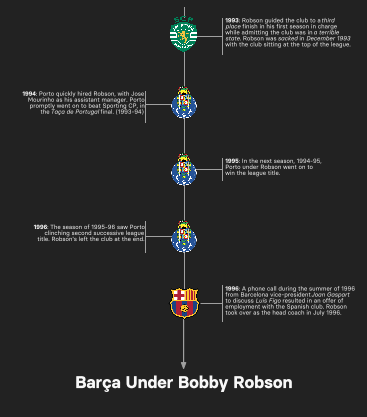

In [23]:
### colors
background_color = "#222222"
text_color = "#F8F8F8"

# create a subplot
fig, ax = plt.subplots(
    facecolor=background_color, figsize=(7,8)
)
ax.set_facecolor(background_color)

# adjust fig
adjustFigAspect(fig, 7/8)

# england
for index, i in enumerate(np.arange(0.3,0.4,0.6)):
    imscatter(
        5, i, "../logos/sporting.png", zoom=0.022,
    )
    
# psv
for index, i in enumerate(np.arange(0.9,2.1,0.6)):
    imscatter(5, i, "../logos/porto.png", zoom=0.028)

# barca
imscatter(5, 2.702, "../logos/barcelona.png", zoom=0.09)

# fulham line
ax.plot(
    [5, 5.06], [0.31, 0.31], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)
ax.plot(
    [5.06, 5.06], [0.15, 0.47], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)

# ipswich line
ax.plot(
    [5, 4.94], [0.92, 0.92], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)
ax.plot(
    [4.94, 4.94], [0.8, 1.08], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)

# 2
ax.plot(
    [5, 5.06], [1.5, 1.5], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)
ax.plot(
    [5.06, 5.06], [1.4, 1.6], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)

# 3
ax.plot(
    [5, 4.94], [2.1, 2.1], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)
ax.plot(
    [4.94, 4.94], [1.96, 2.24], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)

# 4
ax.plot(
    [5, 5.06], [2.7, 2.7], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)
ax.plot(
    [5.06, 5.06], [2.54, 2.86], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)

# timeline texts
fulham = """<1993>: Robson guided the club to a <third>
<place> finish in his first season in charge
while admitting the club was in <a terrible>
<state>. Robson was <sacked> in <December 1993>
with the club sitting at the top of the league."""

ips_1 = """<1994>: Porto quickly hired Robson, with Jose
   Mourinho as his assistant manager. Porto
    promptly went on to beat Sporting CP, in
          the <Taça de Portugal> final. (1993-94)"""

ips_2 = """<1995>: In the next season, 1994-95,
Porto under Robson went on to
win the league title."""

ips_3 = """<1996>: The season of 1995-96 saw Porto
      clinching second successive league
  title. Robson's left the club at the end."""

ips_4 = """<1996>: A phone call during the summer of 1996
from Barcelona vice-president <Joan Gaspart>
to discuss <Luís Figo> resulted in an offer of
employment with the Spanish club. Robson
took over as the head coach in July 1996."""

# texts
text_values = [
    {
        'x': 5.065, 'y': 0.155, 's': fulham, "color": "#F8F8F8", 
        "va": "top", "fontsize": 6, "fontproperties": font_normal.prop,
        "highlight_textprops": [
            {"fontproperties": font_bold.prop}, 
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
        ],
        "vsep": 1,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 4.937, 'y': 0.81, 's': ips_1, "color": "#F8F8F8", "ha": "right",
        "va": "top", "fontsize": 6, "fontproperties": font_normal.prop,
        "highlight_textprops": [
            {"fontproperties": font_bold.prop}, 
            {"fontproperties": font_italic.prop},
        ],
        "vsep": 1,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 5.065, 'y': 1.41, 's': ips_2, "color": "#F8F8F8", 
        "va": "top", "fontsize": 6, "fontproperties": font_normal.prop,
        "highlight_textprops": [
            {"fontproperties": font_bold.prop},
        ],
        "vsep": 1,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 4.937, 'y': 2, 's': ips_3, "color": "#F8F8F8", "ha": "right",
        "va": "top", "fontsize": 6, "fontproperties": font_normal.prop,
        "highlight_textprops": [
            {"fontproperties": font_bold.prop}, 
        ],
        "vsep": 1,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 5.065, 'y': 2.55, 's': ips_4, "color": "#F8F8F8", 
        "va": "top", "fontsize": 6, "fontproperties": font_normal.prop,
        "highlight_textprops": [
            {"fontproperties": font_bold.prop}, 
            {"fontproperties": font_italic.prop},            
            {"fontproperties": font_italic.prop},
        ],
        "vsep": 1,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 5, 'y': 3.34, 's': "Barça Under <Bobby Robson>", "color": "#F8F8F8", "ha": "center",
        "va": "top", "fontsize": 17, "fontproperties": font_bold.prop,
        "highlight_textprops": [
            {"fontproperties": font_bold.prop},
        ],
        "vsep": 1,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
]

for text in text_values:
    ax_text(ax=ax, **text)

ax.plot(
    [5, 5], [-0.5, 0.14], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)
ax.plot(
    [5, 5], [0.3, 0.76], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)
ax.plot(
    [5, 5], [0.8, 2.82], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)

## style for arrows
style = "Simple, tail_width=0.01, head_width=4.5, head_length=6"
kw = dict(arrowstyle=style, color="#A0A0A0")

a1 = patches.FancyArrowPatch((5,2.8), (5,3.3), connectionstyle="arc3,rad=0", **kw)
ax.add_patch(a1)
    
# tidy axis
ax.axis("off")

# _ = add_image(Image.open("../pic/bobby_robson_13.png"), fig, 0.22, 0.68, 0.18, 0.21, alpha=0.8)
# _ = add_image(Image.open("../pic/bobby_robson_14.png"), fig, 0.62, 0.61, 0.14, 0.14, alpha=0.9)
# _ = add_image(Image.open("../pic/bobby_robson_15.png"), fig, 0.21, 0.50, 0.2, 0.14, alpha=0.8)
# _ = add_image(Image.open("../pic/bobby_robson_16.png"), fig, 0.58, 0.38, 0.2, 0.15, alpha=0.8)
# _ = add_image(Image.open("../pic/bobby_robson_17.png"), fig, 0.19, 0.21, 0.27, 0.27, alpha=1)
# _ = add_image(Image.open("../pic/bobby_robson_12.png"), fig, 0.58, 0.16, 0.2, 0.15, alpha=1)

# set limit
ax.set(xlim=(4.725, 5.275), ylim=(3.65,0.05))

fig.savefig("../plots/05_timeline_03.jpg", dpi=500, bbox_inches="tight", pad_inches=-0.02)

# Table

In [73]:
# arrivals
column_01 = [
    "Players", "Ronaldo",
"Vítor Baía",
"Giovanni",
"Fernando Couto",
"Laurent Blanc",
"Hristo Stoichkov",
"Juan Antonio Pizzi",
"Luis Enrique",
]

column_02 = [
    "Club" ,"PSV Eindhoven",
"FC Porto",
"Santos FC",
"AC Parma",
"AJ Auxerre",
"AC Parma",
"CD Tenerife",
"Real Madrid",
]

# departures
column_03 = [
    "Players",
    "Gheorghe Hagi",
"Meho Kodro",
"Jordi Cruyff",
"Robert Prosinecki",
"Toni Velamazán",
"José Mari Bakero",
"Thomas Christiansen",
"Lluís Carreras"
]

column_04 = [ 
    "Club",
"Galatasaray SK",
"CD Tenerife",
"Manchester United",
"Sevilla FC",
"Real Oviedo",
"Tiburones Rojos",
"Real Oviedo",
"RCD Mallorca",
]

In [77]:
def make_table(
    ax, values, text_color, x=6, main_y=32.985,
    col_color_bck="#8685EF", col_color="#F8F8F8",
    row_color="#383645", table_lines="#222222",
    x_hor=[-3, 35], y_hor=33.005, 
    x_ver=-3, y_ver=[32.355, 33.005],
    inc_x_1=20, inc_y_1=0.05,
    inc_x_2=19, rect_01={}, rect_02={},
    xlim=(-3.8,36.2), ylim=(32.05,33.012)
):  
    for index in range(len(values)):
        y = main_y
        
        for count, value in enumerate(values[index]):
            if count == 0:
                fm = font_medium.prop
                size = 12.5
                bck = col_color_bck
                color = col_color
                y = y - 0.005
            else:
                fm = font_normal.prop
                size = 10
                y = y
                bck = row_color
                color = text_color

            ax.text(
                x=x, y=y, s=value, color=color,
                ha="center", va="center", fontproperties=fm,
                size=size, zorder=4,
                path_effects=[patheffects.withStroke(linewidth=3, foreground=bck)]
            )

            if count == 0:
                y = 32.93
            else:
                y -= 0.05

        x += inc_x_1
    
    # add rect
    if len(rect_01) != 0 and len(rect_02) != 0:
        rect = patches.Rectangle(**rect_01)
        ax.add_patch(rect)

        rect = patches.Rectangle(**rect_02)
        ax.add_patch(rect)
    
    # horizontal lines
    for i in range(len(values[0])+1):      
        ax.plot(
            x_hor, [y_hor, y_hor], color=table_lines, lw=1, zorder=5
        )

        y_hor -= inc_y_1
    
    # vertical lines
    for i in range(len(values)+2):
        ax.plot(
            [x_ver, x_ver], y_ver, color=table_lines, lw=1, zorder=5
        )

        x_ver += inc_x_2
    
    # set limit
    ax.set(xlim=xlim, ylim=ylim)

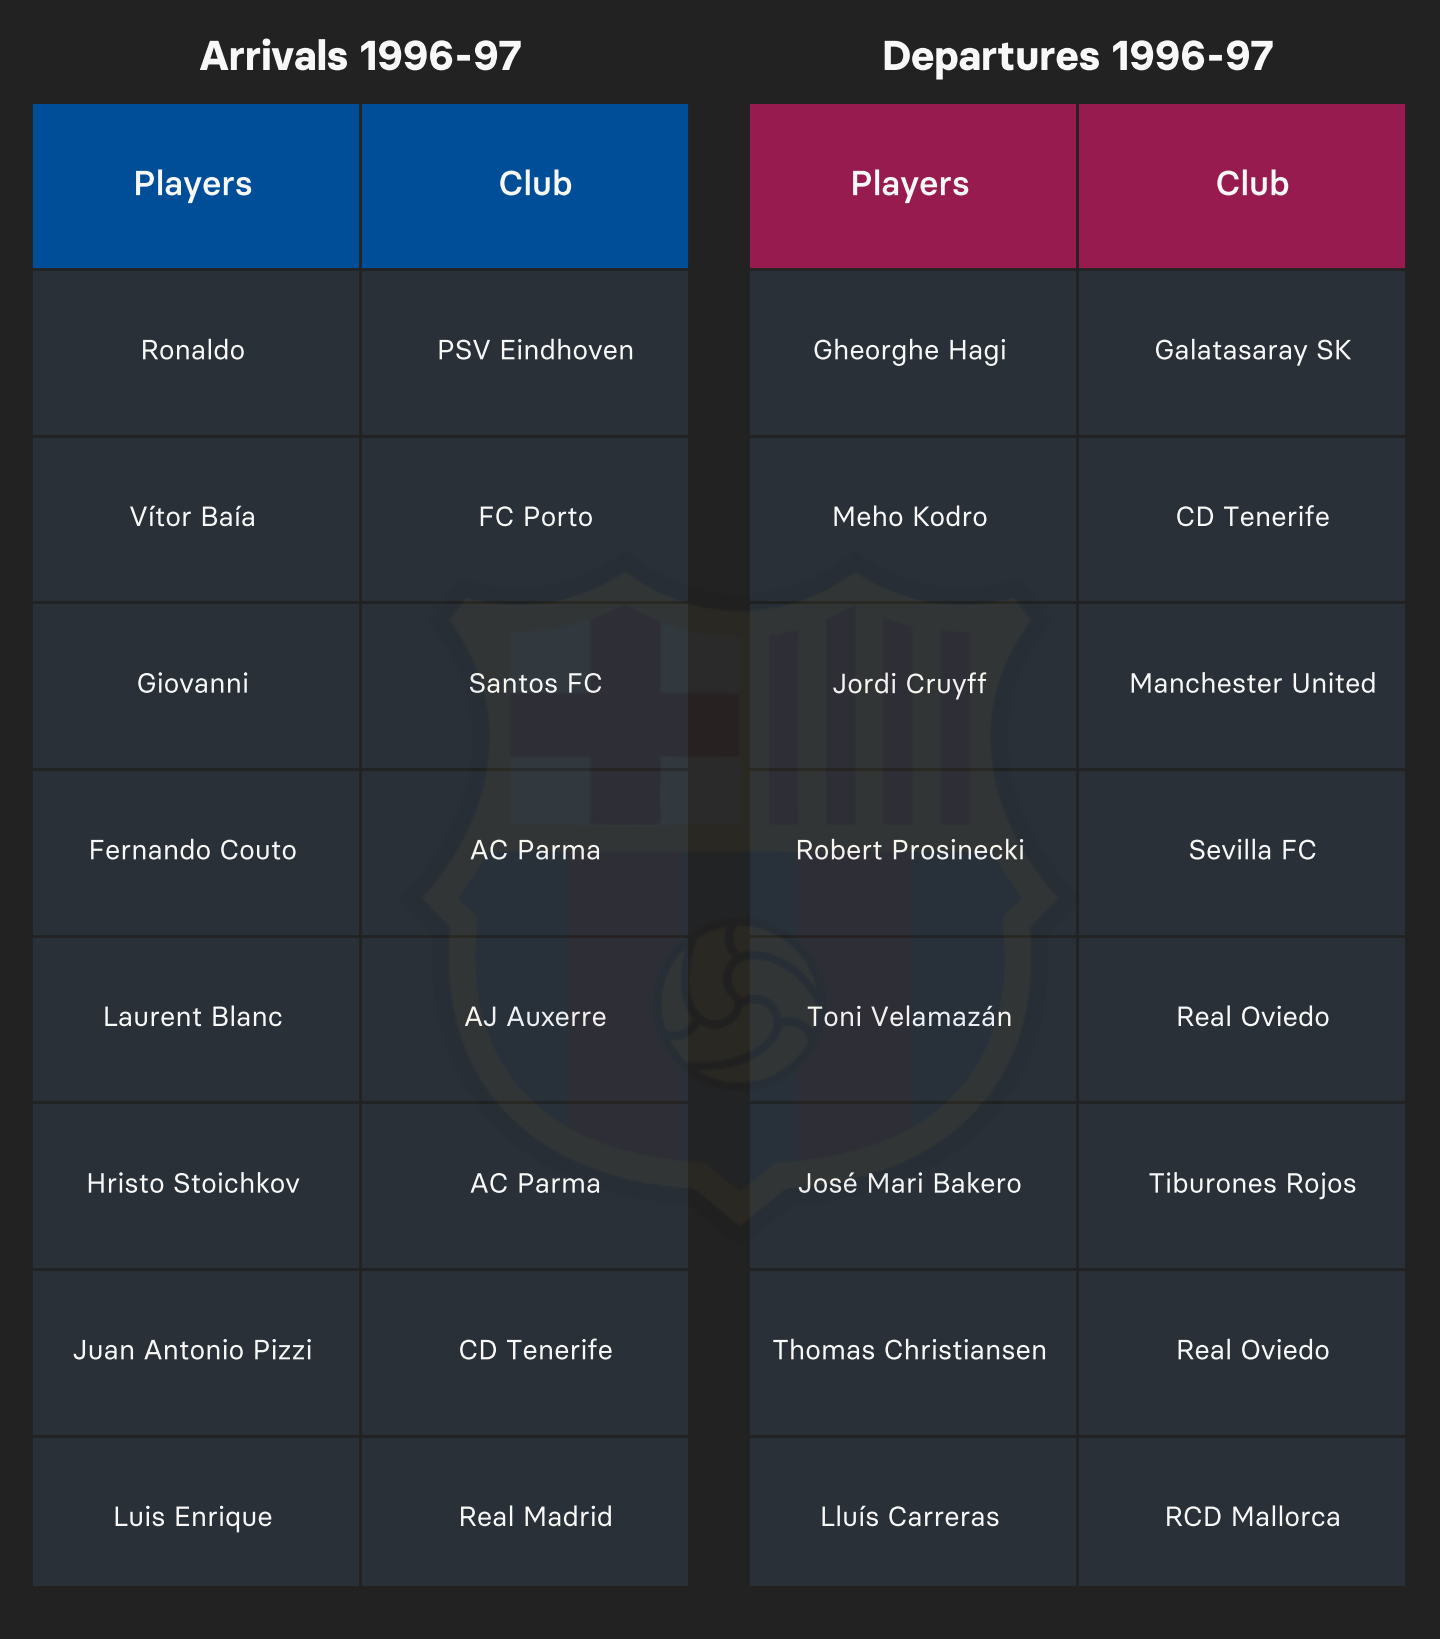

In [80]:
# colors
background_color = "#222222"
text_color = "#F8F8F8"

# create a subplot
fig, axes = plt.subplots(
    nrows=1, ncols=2, facecolor=background_color, figsize=(10,10), dpi=200
)

adjustFigAspect(fig, 7/8)

row_color="#293037"

for index, ax in enumerate(fig.get_axes()):
    ax.set_facecolor(background_color)
    
    if index == 0:
        col_color_bck = "#004D98"
        
        make_table(
            ax, [column_01, column_02], text_color, x=8.8,
            col_color_bck=col_color_bck, row_color=row_color,
            rect_01 = dict(xy=(-3, 32.955), width=48, height=0.0495, lw=0, color=col_color_bck, zorder=1.1),
            rect_02 = dict(xy=(-3, 32.56), width=48, height=0.405, lw=0, fc=row_color, zorder=1),
            inc_x_1=25, inc_x_2=24, x_hor=[-3, 45],
            ylim=(32.55, 33.03), xlim=(-3.8, 46)
        )
        
        ax.text(
            x=21, y=33.018, s="Arrivals 1996-97", color=text_color,
            ha="center", va="center", fontproperties=font_bold.prop,
            size=15, zorder=4,
            path_effects=[patheffects.withStroke(linewidth=3, foreground=background_color)]
        )
    
    elif index == 1:
        
        col_color_bck = "#971B4E"
        
        make_table(
            ax, [column_03, column_04], text_color, x=8.8,
            col_color_bck=col_color_bck, row_color=row_color, y_ver=[32.15,33.005],
            rect_01 = dict(xy=(-3, 32.955), width=48, height=0.0495, lw=0, color=col_color_bck, zorder=1.1),
            rect_02 = dict(xy=(-3, 32.56), width=48, height=0.405, lw=0, fc=row_color, zorder=1),
            inc_x_1=25, inc_x_2=24, x_hor=[-3, 45],
            ylim=(32.55, 33.03), xlim=(-3.8, 46)
        )
        
        ax.text(
            x=21, y=33.018, s="Departures 1996-97", color=text_color,
            ha="center", va="center", fontproperties=font_bold.prop,
            size=15, zorder=4,
            path_effects=[patheffects.withStroke(linewidth=3, foreground=background_color)]
        )
        
    ax.axis("off")

fig.subplots_adjust(wspace=0.05, hspace=0.01)

_ = add_image(Image.open("../../03_league_table/barcelona.png"), fig, 0.26, 0.21, 0.5, 0.5, alpha=0.04)

In [81]:
fig.savefig("../plots/table.jpg", dpi=500, bbox_inches="tight", pad_inches=0.0)

## Quotes

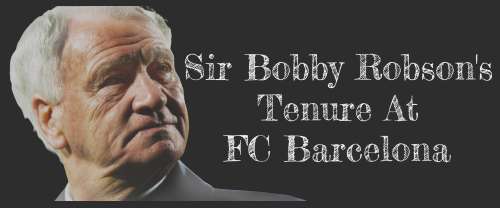

In [272]:
bck_color = "#2d2d2d"
text_color = "#F0F0F0"

fig, ax = plt.subplots(facecolor=bck_color, figsize=(6,6))
ax.set_facecolor(bck_color)

adjustFigAspect(fig, 16/9)

# image
# img = mpimg.imread("../pic/bobby_02.png")
# ax.imshow(img, extent=[0.485, 0.495, 0.435, 0.445], alpha=0.7)

_ = add_image(Image.open("../pic/bobby_02.png"), fig, 0.03, 0.1, 0.8, 0.8, alpha=0.75)

# add text
# quote = """\"The Legacy
# of
# Johan Cruyff\""""

# quote_2 = """—  Miquel Àngel Nadal
#         (Former FCB Player)"""

# text = ax.text(
#     x=0.49, y=0.446, s=quote, ha="center", va="center", size=20,
#     color=text_color, fontproperties=font_italic.prop, zorder=3,
# )
# text = ax.text(
#     x=0.504, y=0.4385, s=quote_2, ha="center", va="center", size=20,
#     color=text_color, fontproperties=font_quote.prop, zorder=3,
# )

quote = """Sir Bobby Robson's
Tenure At
FC Barcelona"""

text = ax.text(
    x=0.87, y=0.46, s=quote, ha="center", va="center", size=35,
    color=text_color, fontproperties=font_main.prop, zorder=3,
    path_effects=[patheffects.withStroke(linewidth=3, foreground=bck_color)]
)

ax.axis("off")

plt.show()

In [273]:
fig.savefig("../plots/main.jpg", dpi=500, bbox_inches="tight", pad_inches=0.01)

## Data

In [43]:
# df = pd.read_csv("../data/cruyff.csv")

# df["Academy Players"] = df["Academy Players"].apply(lambda x: x[1:-1].split('/'))
# df["Debuts Players(Academy)"] = df["Debuts Players(Academy)"].apply(lambda x: x[1:-1].split('/'))

In [6]:
df = pd.read_pickle("../data/cruyff.pkl")

df["Academy"] = df["Academy Players"].apply(lambda x: len(x))
df["Debut"] = df["Debuts Players(Academy)"].apply(lambda x: len(x))

df["Total Academy"] = df["Academy"] + df["Debut"]

df["perAca"] = round(df["Total Academy"] / df["Total Players"] * 100, 2)
df["perDeb"] = round(df["Debut"] / df["Total Academy"] * 100, 2)

In [7]:
df

,Season,Manager,Total Players,Academy Players,Debuts Players(Academy),Academy,Debut,Total Academy,perAca,perDeb
0,1988-89,Johan Cruyff,25,"[Luis Milla Aspas, Francisco José Carrasco Hid...","[José Pérez Serer, Guillermo Amor Martínez, Jo...",4,4,8,32.00,50.00
1,1989-90,Johan Cruyff,25,"[Luis Milla Aspas, Guillermo Amor Martínez, Jo...","[Jesús Julián Lucendo Heredia, Antonio Pinilla...",4,2,6,24.00,33.33
2,1990-91,Johan Cruyff,27,"[Guillermo Amor Martínez, Jordi Roura Solà, Se...","[Albert Ferrer Llopis, Carles Busquets Barroso...",4,6,10,37.04,60.00
3,1991-92,Johan Cruyff,21,"[Guillermo Amor Martínez, Antonio Pinilla Mira...",,6,0,6,28.57,0.00
4,1992-93,Johan Cruyff,23,"[Guillermo Amor Martínez, Albert Ferrer Llopis...","[Òscar García Junyent, Lluís Carreras Ferrer]",4,2,6,26.09,33.33
5,1993-94,Johan Cruyff,21,"[Guillermo Amor Martínez, Albert Ferrer Llopis...",[Sergi Barjuán Esclusa],5,1,6,28.57,16.67
6,1994-95,Johan Cruyff,26,"[Guillermo Amor Martínez, Albert Ferrer Llopis...","[Jesús Mariano Angoy Gil, Johan Jordi Cruijff ...",5,5,10,38.46,50.00
7,1995-96,Johan Cruyff,30,"[Guillermo Amor Martínez, Albert Ferrer Llopis...","[Iván de la Peña López, Albert Celades López, ...",10,10,20,66.67,50.00


In [9]:
df.loc[7, "Academy Players"] + df.loc[7, "Debuts Players(Academy)"]

['Guillermo Amor Martínez',
 'Albert Ferrer Llopis',
 'Josep Guardiola Sala',
 'Òscar García Junyent',
 'Carles Busquets Barroso',
 'Sergi Barjuán Esclusa',
 'Jesús Mariano Angoy Gil',
 'Johan Jordi Cruijff Coster',
 'Roger García Junyent',
 'Lluís Carreras Ferrer',
 'Iván de la Peña López',
 'Albert Celades López',
 'Antonio Velamazán Tejedor',
 'Juan Carlos Moreno Rodríguez',
 'Xavier Roca Mateo',
 'Enrique Álvarez Sanjuán',
 'Francisco Javier García Pimienta',
 'Josep Setvalls Morera',
 'Francisco Joaquín Pérez Rufete',
 'Juan José Carricondo Pérez']

## Nested Bar

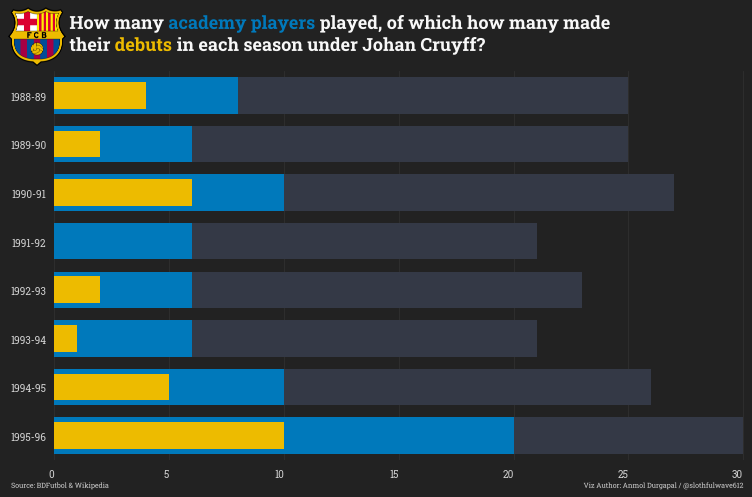

In [116]:
bck_color = "#222222"
text_color = "#F8F8F8"

fig, ax = plt.subplots(facecolor=bck_color, figsize=(18,12))
ax.set_facecolor(bck_color)

adjustFigAspect(fig, 16/9)

# make the bars
ax.barh(df["Season"].values[::-1], df["Total Players"].values[::-1], height=0.75, fc="#343946", zorder=2)
ax.barh(df["Season"].values[::-1], df["Total Academy"].values[::-1], height=0.75, fc="#0079BB", zorder=3)
ax.barh(df["Season"].values[::-1], df["Debut"].values[::-1], height=0.55, fc="#EDBB00", zorder=3)

# turn off the spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# set xticks
plt.xticks(range(0,31,5), fontproperties=font_normal.prop, size=10)

# set color for tick-params
ax.tick_params(axis="both", which="both", length=0, colors="#D3D3D3", pad=8)

# set ticklables
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_normal.prop)
    label.set_horizontalalignment("right")
    label.set_fontsize(10)
for label in ax.get_yticklabels() :
    label.set_fontproperties(font_normal.prop)
    label.set_fontsize(10)

# set the grid
ax.grid(b=True, alpha=0.07, axis="x", color=text_color)

# set limit
ax.set(xlim=(0,30.1),ylim=(-0.5,7.5))

# add image
_ = add_image(Image.open("../../../my_analysis/logos/Barcelona.png"), fig, 0.185, 0.73, 0.07, 0.07)

# title
fig_text(
    x=0.245, y=0.79, s="How many <academy players> played, of which how many made\ntheir <debuts> in each season under Johan Cruyff?",
    fig=fig, color=text_color, fontproperties=font_bold.prop,
    highlight_textprops=[{"color": "#0079BB"}, {"color": "#EDBB00"}], size=18,
    path_effects=[patheffects.withStroke(linewidth=3, foreground=bck_color)]
)

# title, sub-title and credits --> list containing dict of values for text method
text_values = [
    {
        'x': 0.765, 'y': 0.245, 's': "Viz Author: Anmol Durgapal / @slothfulwave612", "color": "#D3D3D3", 
        "ha": "right", "va": "center", "fontsize": 7, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=3, foreground=bck_color)]
    },
    {
        'x': 0.2, 'y': 0.245, 's': "Source: BDFutbol & Wikipedia", "color": "#D3D3D3", 
        "ha": "left", "va": "center", "fontsize": 7, "fontproperties": font_normal.prop,
        "path_effects": [patheffects.withStroke(linewidth=3, foreground=bck_color)]
    },
]

for text in text_values:
    fig.text(**text)

plt.show()

In [117]:
fig.savefig("../plots/01_academy_players.jpg", dpi=500, bbox_inches="tight", pad_inches=0.01)

## Waterfall Charts / Dot Plot

In [172]:
df = pd.read_csv("../data/bobby.csv")

In [173]:
total_players = len(df)
academy_grad = df["Academy"].value_counts()[1]
non_grad = df["Academy"].value_counts()[0]
under_24 = sum(df["Age"] <= 24)
under_30 = len(df.loc[(df["Age"] >= 25) & (df["Age"] <= 30)])
over_30 = sum(df["Age"] > 30)

In [174]:
age_count = df["Age"].value_counts()

In [175]:
academy_count = df.groupby(by="Age").sum()

In [176]:
avg_age = round(df["Age"].mean(), 2)

In [177]:
df

,Name,Age,Academy
0,Vítor Manuel Martins Baía,27,0
1,Gheorghe Popescu,29,0
2,Sergi Barjuán Esclusa,25,1
3,Laurent Robert Blanc,31,0
4,Miquel Àngel Nadal Homar,30,0
5,Josep Guardiola Sala,25,1
6,Luís Filipe Madeira Caeiro Figo,24,0
7,Giovanni Silva de Oliveira,24,0
8,Ronaldo Luís Nazário de Lima,20,0
9,Luis Enrique Martínez García,26,0


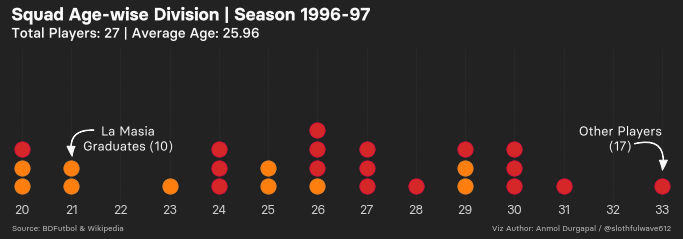

In [179]:
bck_color = "#222222"
text_color = "#F8F8F8"

fig, ax = plt.subplots(facecolor=bck_color, figsize=(12,3))
ax.set_facecolor(bck_color)

for age, count in zip(age_count.index, age_count.values):
    y = 0
    
    acad_count = count - academy_count.loc[age]["Academy"]
    
    for i in range(count - acad_count):
        ax.scatter(age, y, ec="#E98227", fc="#ff7f0e", s=230, zorder=2)
        y += 0.08
    
    for i in range(acad_count):
        ax.scatter(age, y, ec="crimson", fc="#d62728", s=230, zorder=2)
        y += 0.08

# turn off the spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
        
# turn-off x-axis
ax.get_yaxis().set_visible(False)

# set y-ticks
plt.xticks(range(df["Age"].min(), df["Age"].max() + 1), fontproperties=font_normal.prop, size=12, ha="center")

# set color for tick-params
ax.tick_params(axis='x', which="both", length=0, colors="#D0D0D0", pad=0)

for label in ax.get_xticklabels() :
    label.set_fontproperties(font_normal.prop)
    label.set_horizontalalignment("center")
    label.set_verticalalignment("center")
    label.set_fontsize(13)

# set the grid
ax.grid(b=True, alpha=0.09, axis="both", color=text_color, ls=':')

# style for arrows
style = "Simple, tail_width=0.5, head_width=8, head_length=10"
kw = dict(arrowstyle=style, color=text_color)

# plot arrow 1
a1 = patches.FancyArrowPatch((32.4,0.18), (33,0.06), connectionstyle="arc3,rad=-.8", **kw)
ax.add_patch(a1)

# plot arrow 2
a1 = patches.FancyArrowPatch((21.5,0.24), (21.03,0.12), connectionstyle="arc3,rad=.7", **kw)
ax.add_patch(a1)

# title, sub-title and credits --> list containing dict of values for text method
text_values = [
    {
        'x': 32.15, 'y': 0.2, 's': f"Other Players\n({non_grad})", "ha": "center", "va": "center",
        "color": text_color, "fontproperties": font_normal.prop, "size": 13,
        "path_effects": [patheffects.withStroke(linewidth=3, foreground=bck_color)]
    },
    {
        'x': 22.15, 'y': 0.2, 's': f"La Masia\nGraduates ({academy_grad})", "ha": "center", "va": "center",
        "color": text_color, "fontproperties": font_normal.prop, "size": 13,
        "path_effects": [patheffects.withStroke(linewidth=3, foreground=bck_color)]
    },
]

for text in text_values:
    ax.text(**text)

# title, sub-title and credits --> list containing dict of values for text method
text_values = [
    {
        'x': 0.13, 'y': 1, 's': "Squad Age-wise Division | Season 1996-97",
        "color": text_color, "fontproperties": font_bold.prop, "size": 18,
        "path_effects": [patheffects.withStroke(linewidth=3, foreground=bck_color)]
    },
    {
        'x': 0.13, 'y': 0.92, 's': f"Total Players: {len(df)} | Average Age: {avg_age}",
        "color": text_color, "fontproperties": font_medium.prop, "size": 14,
        "path_effects": [patheffects.withStroke(linewidth=3, foreground=bck_color)]
    },
    {
        'x': 0.894, 'y': 0.04, 's': "Viz Author: Anmol Durgapal / @slothfulwave612", "color": "#D3D3D3", 
        "ha": "right", "va": "center", "fontsize": 8, "fontproperties": font_normal.prop, "alpha": 0.9
    },
    {
        'x': 0.13, 'y': 0.04, 's': "Source: BDFutbol & Wikipedia", "color": "#D3D3D3", 
        "ha": "left", "va": "center", "fontsize": 8, "fontproperties": font_normal.prop, "alpha": 0.9
    },
]

for text in text_values:
    fig.text(**text)

# set limit
ax.set(xlim=(df["Age"].min() - 1 + 0.7, df["Age"].max() + 0.3), ylim=(-0.1,0.6))
    
plt.show()

In [180]:
fig.savefig("../plots/02_bobby_first.jpg", dpi=500, bbox_inches="tight", pad_inches=0.02)

In [92]:
# bck_color = "#222222"
# text_color = "#F8F8F8"

# fig, ax = plt.subplots(facecolor=bck_color, figsize=(18,12))
# ax.set_facecolor(bck_color)

# # make the bars
# ax.bar([0], [non_grad], width=0.7, fc="#D7A009", zorder=2)
# ax.bar([1], [academy_grad], width=0.7, fc="#D7A009", zorder=2, bottom=total_players-academy_grad)
# ax.bar([2], [total_players], width=0.7, fc="#A70042", zorder=2)
# ax.bar([3], [under_24], width=0.7, fc="#155FA8", zorder=2, bottom=total_players-under_24)
# ax.bar([4], [under_30], width=0.7, fc="#155FA8", zorder=2, bottom=total_players-under_30-under_24)
# ax.bar([5], [over_30], width=0.7, fc="#155FA8", zorder=2)

# # turn off the spines
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
# ax.spines["left"].set_visible(False)
# ax.spines["bottom"].set_color("#D3D3D3")
# ax.spines["bottom"].set_alpha(0.5)
# ax.spines["bottom"].set_zorder(1)

# labels = [
#     "Total Non-Academy\nPlayers", "Total Academy Players", "Total Players", 
#     "Under-24\nPlayers", "Players Between\n25-30 Age", "Over-30\nPlayers"
# ]

# # set xticks
# plt.xticks(range(0,6), labels=labels, fontproperties=font_normal.prop, size=7, ha="left")
# plt.yticks(range(0,22,3), fontproperties=font_normal.prop, size=7, ha="left")

# # set color for tick-params
# ax.tick_params(axis="both", which="both", length=0, colors="#D0D0D0", pad=12)

# # set ticklables
# for label in ax.get_xticklabels() :
#     label.set_fontproperties(font_normal.prop)
#     label.set_horizontalalignment("center")
#     label.set_fontsize(12)
# for label in ax.get_yticklabels() :
#     label.set_fontproperties(font_normal.prop)
#     label.set_horizontalalignment("center")
#     label.set_verticalalignment("center")
#     label.set_fontsize(12)

# # set the grid
# ax.grid(b=True, alpha=0.05, axis="both", color=text_color)

# # add image
# _ = add_image(Image.open("../../../my_analysis/logos/Barcelona.png"), fig, 0.09, 0.93, 0.1, 0.1)

# # title, sub-title and credits --> list containing dict of values for text method
# text_values = [
#     {
#         'x': 0.173, 'y': 0.9, 's':"Academy-wise division",
#         "color": "#D7A009", "fontproperties": font_medium.prop, "size": 20,
#         "path_effects": [path_effects.withStroke(linewidth=3, foreground=bck_color)]
#     },
#     {
#         'x': 0.64, 'y': 0.9, 's':"Age-wise division",
#         "color": "#155FA8", "fontproperties": font_medium.prop, "size": 20,
#         "path_effects": [path_effects.withStroke(linewidth=3, foreground=bck_color)]
#     },
#     {
#         'x': 0.173, 'y': 0.99, 's': "How did the squad division look like for FC Barcelona?",
#         "color": text_color, "fontproperties": font_bold.prop, "size": 24,
#         "path_effects": [path_effects.withStroke(linewidth=3, foreground=bck_color)]
#     },
#     {
#         'x': 0.173, 'y': 0.96, 's': "Season 1991-92",
#         "color": text_color, "fontproperties": font_medium.prop, "size": 21.5,
#         "path_effects": [path_effects.withStroke(linewidth=3, foreground=bck_color)]
#     },
#     {
#         'x': 0.90, 'y': 0.06, 's': "Source: BDFutbol & Wikipedia\nViz Author: Anmol Durgapal / @slothfulwave612", "color": "#D3D3D3", 
#         "ha": "right", "va": "center", "fontsize": 12, "fontproperties": font_normal.prop, "alpha": 0.9
#     },
# ]

# for text in text_values:
#     fig.text(**text)


# # title, sub-title and credits --> list containing dict of values for text method
# text_values = [
#     {
#         'x': 0, 'y': 7.5, 's': non_grad, "ha": "center", "va": "center",
#         "color": "#222222", "fontproperties": font_medium.prop, "size": 20,
#         "path_effects": [path_effects.withStroke(linewidth=3, foreground="#D7A009")]
#     },
#     {
#         'x': 1, 'y': 18, 's': academy_grad, "ha": "center", "va": "center",
#         "color": "#222222", "fontproperties": font_medium.prop, "size": 20,
#         "path_effects": [path_effects.withStroke(linewidth=3, foreground="#D7A009")]
#     },
#     {
#         'x': 2, 'y': 10.5, 's': total_players, "ha": "center", "va": "center",
#         "color": "#222222", "fontproperties": font_medium.prop, "size": 20,
#         "path_effects": [path_effects.withStroke(linewidth=3, foreground="#A70042")]
#     },
#     {
#         'x': 3, 'y': 17.5, 's': under_24, "ha": "center", "va": "center",
#         "color": "#222222", "fontproperties": font_medium.prop, "size": 20,
#         "path_effects": [path_effects.withStroke(linewidth=3, foreground="#155FA8")]
#     },
#     {
#         'x': 4, 'y': 7.5, 's': under_30, "ha": "center", "va": "center",
#         "color": "#222222", "fontproperties": font_medium.prop, "size": 20,
#         "path_effects": [path_effects.withStroke(linewidth=3, foreground="#155FA8")]
#     },
#     {
#         'x': 5, 'y': 0.5, 's': over_30, "ha": "center", "va": "center",
#         "color": "#222222", "fontproperties": font_medium.prop, "size": 20,
#         "path_effects": [path_effects.withStroke(linewidth=3, foreground="#155FA8")]
#     },
# ]

# for text in text_values:
#     ax.text(**text)
    

# # set limit
# ax.set(xlim=(-0.5,5.5), ylim=(0,21))

# plt.show()

# fig.savefig("../plots/02_dream_team_division.jpg", dpi=500, bbox_inches="tight", pad_inches=0.01)

## Manager Stats

In [336]:
# df = pd.read_csv("../data/stat_2.csv")
df = pd.read_csv("../data/stats.csv")

In [338]:
df["Total"] = df["Win"] + df["Draw"] + df["Loss"]
df

,Season,Win,Draw,Loss,Trophies,Total
0,1988-89,34,15,6,1,55
1,1989-90,30,9,12,1,51
2,1990-91,34,8,13,1,55
3,1991-92,32,11,10,3,53
4,1992-93,33,12,8,3,53
5,1993-94,34,11,11,1,56
6,1994-95,22,13,15,1,50
7,1995-96,32,19,8,0,59


In [340]:
df["Total"].sum() - 9

423

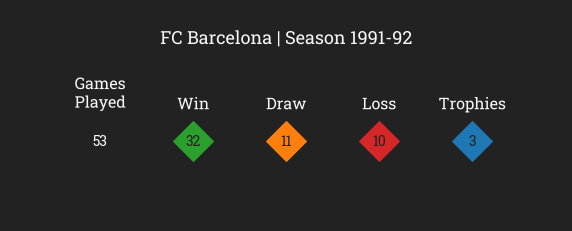

In [16]:
bck_color = "#222222"
text_color = "#F8F8F8"

fig, ax = plt.subplots(facecolor=bck_color, figsize=(10,4))
ax.set_facecolor(bck_color)

# text
text_values = [
    {
        'x': 0.2, 'y': 0.6, 's': "Games\nPlayed", "ha": "center", "va": "center",
        "color": text_color, "fontproperties": font_normal.prop, "size": 16,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=bck_color)]
    },
    {
        'x': 0.4, 'y': 0.55, 's': "Win", "ha": "center", "va": "center",
        "color": text_color, "fontproperties": font_normal.prop, "size": 16,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=bck_color)]
    },
    {
        'x': 0.6, 'y': 0.55, 's': "Draw", "ha": "center", "va": "center",
        "color": text_color, "fontproperties": font_normal.prop, "size": 16,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=bck_color)]
    },
    {
        'x': 0.8, 'y': 0.55, 's': "Loss", "ha": "center", "va": "center",
        "color": text_color, "fontproperties": font_normal.prop, "size": 16,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=bck_color)]
    },
    {
        'x': 1, 'y': 0.55, 's': "Trophies", "ha": "center", "va": "center",
        "color": text_color, "fontproperties": font_normal.prop, "size": 16,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=bck_color)]
    },
    {
        'x': 0.6, 'y': 0.85, 's': "FC Barcelona | Season 1991-92", "ha": "center", "va": "center",
        "color": text_color, "fontproperties": font_normal.prop, "size": 18,
        "path_effects": [path_effects.withStroke(linewidth=3, foreground=bck_color)]
    },
]

for text in text_values:
    ax.text(**text)

# scatter-points
x = 0.2
color = text_color
color_list = ["#2ca02c", "#ff7f0e", "#d62728", "#1f77b4"]
for index, val in enumerate(df.loc[3].values):
    if index > 0:
        color=bck_color
        s = ax.scatter(
            x=x, y=0.38, s=800, marker='D', color=color_list[index-1]
        )
    
    ax.text(
        x=x, y=0.38, s=val, color=color,
        size=14, fontproperties=font_normal.prop,
        ha="center", va="center"
    )

    x += 0.2

# set limit
ax.set(xlim=(0,1.2), ylim=(0,1))

# tidy axis
ax.axis("off")

plt.show()

In [ ]:
fig.savefig("../plots/04_stats_1991_92.jpg", dpi=500, bbox_inches="tight", pad_inches=0.01)

## Playing XI

In [165]:
(50 + 21) / 2

35.5

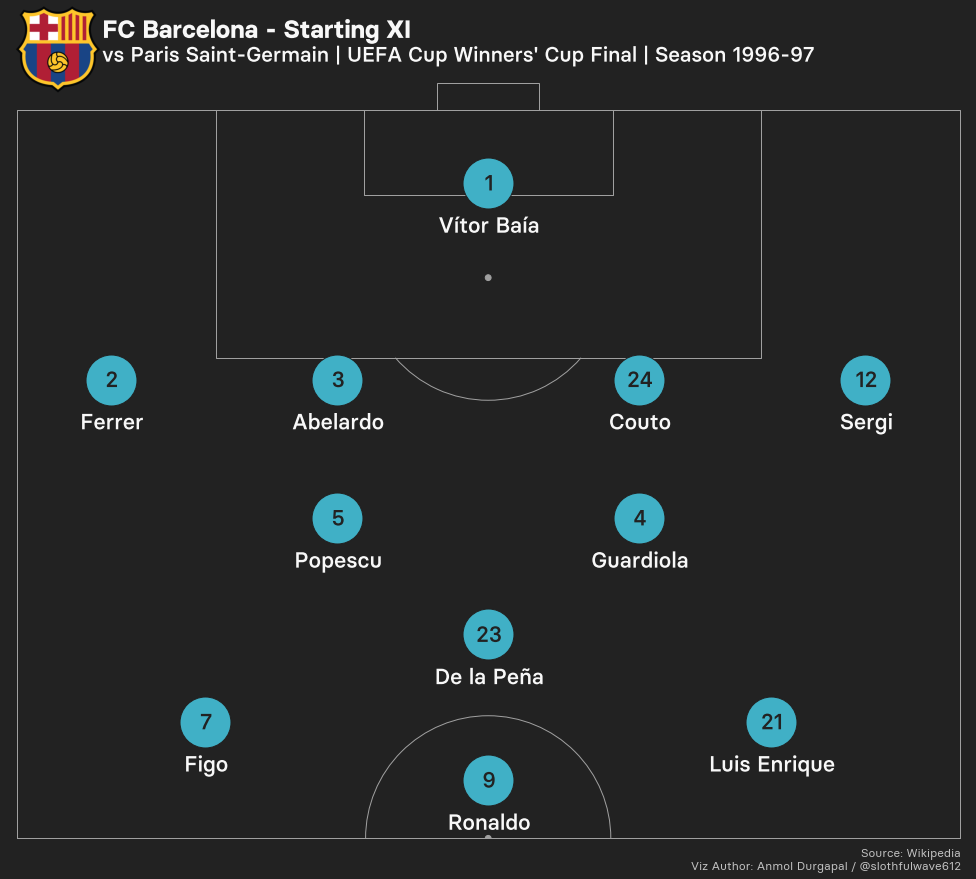

In [167]:
bck_color = "#222222"
text_color = "#F8F8F8"

pitch = VerticalPitch(
    pitch_type="opta", half=True, pitch_color=bck_color, line_color="#A0A0A0", 
    linewidth=1, goal_type="box", pad_bottom=0.06, pad_right=1, pad_left=1
)

fig, ax = pitch.draw(figsize=(16,11))
fig.set_facecolor(bck_color)

adjustFigAspect(fig, 16/9)

x_axis = [50, 66, 34, 90, 10, 34, 66, 50, 50, 80, 20]
y_axis = [95, 81.5, 81.5, 81.5, 81.5, 72, 72, 64, 54, 58, 58]
number = [1, 3, 24, 2, 12, 4, 5, 23, 9, 7, 21]
name = [
    "Vítor Baía", "Abelardo", "Couto", "Ferrer", "Sergi", 
    "Guardiola", "Popescu", "De la Peña", "Ronaldo", "Figo", "Luis Enrique"
]
# name = ["", "Laudrup", "Eusebio", "Juan Carlos", "Salinas", "Stoichkov"]

# scatter players
for x, y, num, player in zip(x_axis, y_axis, number, name):
    ax.scatter(
        x, y, s=2600, fc="#40b0c6", ec="#212121"
    )
    
    ax.text(
        x-0.1, y-0.1, num, color=bck_color, size=22,
        fontproperties=font_medium.prop, ha="center", va="center",
        path_effects=[patheffects.withStroke(linewidth=3, foreground="#40b0c6")]
    )
    
    ax.text(
        x-0.1, y-3, player, color=text_color, size=22,
        fontproperties=font_medium.prop, ha="center", va="center",
        path_effects=[patheffects.withStroke(linewidth=5, foreground=bck_color)]
    )

# add image
_ = add_image(Image.open("../../03_league_table/barcelona.png"), fig, 0.071, 0.96, 0.11, 0.11)

# title
text_values = [
    {
        'x': 0.165, 'y': 1.03, 's': "FC Barcelona - Starting XI",
        "color": text_color, "fontproperties": font_bold.prop, "size": 25,
        "path_effects": [patheffects.withStroke(linewidth=3, foreground=bck_color)]
    },
    {
        'x': 0.165, 'y': 1, 's': "vs Paris Saint-Germain | UEFA Cup Winners' Cup Final | Season 1996-97",
        "color": text_color, "fontproperties": font_medium.prop, "size": 21,
        "path_effects": [patheffects.withStroke(linewidth=3, foreground=bck_color)]
    },
    {
        'x': 0.91, 'y': -0.008, 's': "Source: Wikipedia\nViz Author: Anmol Durgapal / @slothfulwave612", "color": "#D3D3D3", 
        "ha": "right", "va": "center", "fontsize": 12, "fontproperties": font_normal.prop, "alpha": 0.9
    },
]

for text in text_values:
    fig.text(**text)

In [168]:
fig.savefig("../plots/07_final_11.jpg", dpi=500, bbox_inches="tight", pad_inches=0.02)

http://en.espn.co.uk/football/sport/story/85217.html

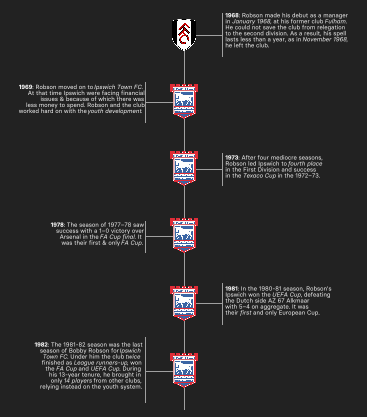

In [37]:
### colors
background_color = "#222222"
text_color = "#F8F8F8"

# create a subplot
fig, ax = plt.subplots(
    facecolor=background_color, figsize=(7,8)
)
ax.set_facecolor(background_color)

# adjust fig
adjustFigAspect(fig, 7/8)

# fulham
imscatter(5, 0.3, "../logos/fulham.png", zoom=0.02)

# Ipshwich
for index, i in enumerate(np.arange(0.9,3.4,0.6)):
    imscatter(5, i, "../logos/ipswich_town_fc.png", zoom=0.023)

# fulham line
ax.plot(
    [5, 5.06], [0.3, 0.3], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)
ax.plot(
    [5.06, 5.06], [0.11, 0.49], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)

# ipswich line
ax.plot(
    [5, 4.94], [0.9, 0.9], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)
ax.plot(
    [4.94, 4.94], [0.72, 1.08], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)

# 2
ax.plot(
    [5, 5.06], [1.5, 1.5], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)
ax.plot(
    [5.06, 5.06], [1.36, 1.64], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)

# 3
ax.plot(
    [5, 4.94], [2.1, 2.1], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)
ax.plot(
    [4.94, 4.94], [1.96, 2.24], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)

# 4
ax.plot(
    [5, 5.06], [2.7, 2.7], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)
ax.plot(
    [5.06, 5.06], [2.52, 2.88], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)

# 5
ax.plot(
    [5, 4.94], [3.3, 3.3], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)
ax.plot(
    [4.94, 4.94], [3, 3.58], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)

# timeline texts
fulham = """<1968>: Robson made his debut as a manager
in <January 1968>, at his former club <Fulham>.
He could not save the club from relegation
to the second division. As a result, his spell
lasts less than a year, as in <November 1968>,
he left the club."""

ips_1 = """<1969>: Robson moved on to <Ipswich Town FC>.
     At that time Ipswich were facing financial
            issues & because of which there was
    less money to spend. Robson and the club
worked hard on with the <youth development>."""

ips_2 = """<1973>: After four mediocre seasons,
Robson led Ipswich to <fourth place>
in the First Division and success
in the <Texaco Cup> in the 1972–73."""

ips_3 = """<1978>: The season of 1977–78 saw
   success with a 1–0 victory over
     Arsenal in the <FA Cup final>. It
      was their first & only <FA Cup>."""

ips_4 = """<1981>: In the 1980-81 season, Robson's
Ipswich won the <UEFA Cup>, defeating
the Dutch side AZ 67 Alkmaar
with 5–4 on aggregate. It was
their <first> and only European Cup."""

ips_5 = """<1982>: The 1981-82 season was the last
   season of Bobby Robson for <Ipswich>
   -<Town FC>. Under him the club <twice>
    finished as <League runners-up>, won 
      the <FA Cup> and <UEFA Cup>. During 
        his 13-year tenure, he brought in
         only <14 players> from other clubs,
   relying instead on the youth system."""

# texts
text_values = [
    {
        'x': 5.065, 'y': 0.11, 's': fulham, "color": "#F8F8F8", 
        "va": "top", "fontsize": 6, "fontproperties": font_normal.prop,
        "highlight_textprops": [
            {"fontproperties": font_bold.prop}, 
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
        ],
        "vsep": 1,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 4.937, 'y': 0.75, 's': ips_1, "color": "#F8F8F8", "ha": "right",
        "va": "top", "fontsize": 6, "fontproperties": font_normal.prop,
        "highlight_textprops": [
            {"fontproperties": font_bold.prop}, 
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
        ],
        "vsep": 1,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 5.065, 'y': 1.38, 's': ips_2, "color": "#F8F8F8", 
        "va": "top", "fontsize": 6, "fontproperties": font_normal.prop,
        "highlight_textprops": [
            {"fontproperties": font_bold.prop}, 
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
        ],
        "vsep": 1,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 4.937, 'y': 1.98, 's': ips_3, "color": "#F8F8F8", "ha": "right",
        "va": "top", "fontsize": 6, "fontproperties": font_normal.prop,
        "highlight_textprops": [
            {"fontproperties": font_bold.prop}, 
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
        ],
        "vsep": 1,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 5.065, 'y': 2.55, 's': ips_4, "color": "#F8F8F8", 
        "va": "top", "fontsize": 6, "fontproperties": font_normal.prop,
        "highlight_textprops": [
            {"fontproperties": font_bold.prop}, 
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
        ],
        "vsep": 1,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 4.937, 'y': 3.05, 's': ips_5, "color": "#F8F8F8", "ha": "right",
        "va": "top", "fontsize": 6, "fontproperties": font_normal.prop,
        "highlight_textprops": [
            {"fontproperties": font_bold.prop}, 
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
        ],
        "vsep": 1,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
]

for text in text_values:
    ax_text(ax=ax, **text)

ax.plot(
    [5, 5], [0.3, 3.8], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)
    
# tidy axis
ax.axis("off")


# _ = add_image(Image.open("../pic/bobby_robson_01.png"), fig, 0.25, 0.74, 0.1, 0.1)
# _ = add_image(Image.open("../pic/bobby_robson_02.png"), fig, 0.63, 0.628, 0.14, 0.135, alpha=0.9)
# _ = add_image(Image.open("../pic/bobby_robson_03.png"), fig, 0.21, 0.51, 0.2, 0.15, alpha=0.8)
# _ = add_image(Image.open("../pic/bobby_robson_04.png"), fig, 0.6, 0.385, 0.2, 0.15, alpha=0.8)
# _ = add_image(Image.open("../pic/bobby_robson_05_.png"), fig, 0.22, 0.285, 0.2, 0.15, alpha=1)
# _ = add_image(Image.open("../pic/bobby_robson_06.png"), fig, 0.6, 0.16, 0.2, 0.15, alpha=1)

# set limit
ax.set(xlim=(4.725, 5.275), ylim=(3.65,0.05))

fig.savefig("../plots/03_timeline_01.jpg", dpi=500, bbox_inches="tight", pad_inches=-0.02)

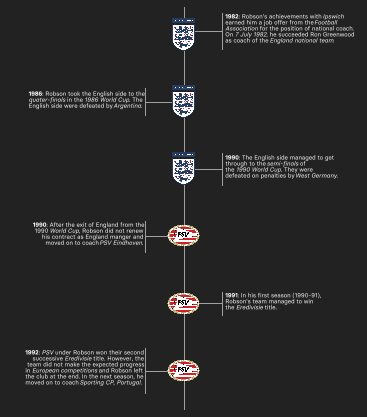

In [27]:
##### colors
background_color = "#222222"
text_color = "#F8F8F8"

# create a subplot
fig, ax = plt.subplots(
    facecolor=background_color, figsize=(7,8)
)
ax.set_facecolor(background_color)

# adjust fig
adjustFigAspect(fig, 7/8)

# england
for index, i in enumerate(np.arange(0.3,1.6,0.6)):
    imscatter(5, i, "../logos/england.png", zoom=0.028)
    
# psv
for index, i in enumerate(np.arange(2.1,3.4,0.6)):
    imscatter(5, i, "../logos/psv.png", zoom=0.0135)

# fulham line
ax.plot(
    [5, 5.06], [0.27, 0.27], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)
ax.plot(
    [5.06, 5.06], [0.11, 0.43], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)

# ipswich line
ax.plot(
    [5, 4.94], [0.9, 0.9], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)
ax.plot(
    [4.94, 4.94], [0.78, 1.02], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)

# 2
ax.plot(
    [5, 5.06], [1.5, 1.5], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)
ax.plot(
    [5.06, 5.06], [1.36, 1.64], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)

# 3
ax.plot(
    [5, 4.94], [2.1, 2.1], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)
ax.plot(
    [4.94, 4.94], [1.96, 2.24], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)

# 4
ax.plot(
    [5, 5.06], [2.7, 2.7], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)
ax.plot(
    [5.06, 5.06], [2.6, 2.8], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)

# 5
ax.plot(
    [5, 4.94], [3.3, 3.3], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)
ax.plot(
    [4.94, 4.94], [3.1, 3.5], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)

# timeline texts
fulham = """<1982>: Robson's achievements with <Ipswich>
earned him a job offer from the <Football>
<Association> for the position of national coach.
On <7 July 1982>, he succeeded Ron Greenwood
as coach of the <England national team>."""

ips_1 = """<1986>: Robson took the English side to the
<quater-finals> in the <1986 World Cup>. The
English side were defeated by <Argentina>."""

ips_2 = """<1990>: The English side managed to get
through to the <semi-finals> of
the <1990 World Cup>. They were
defeated on penalties by <West Germany>."""

ips_3 = """<1990>: After the exit of England from the
 1990 <World Cup>, Robson did not renew
     his contract as England manger and
       moved on to coach <PSV Eindhoven>."""

ips_4 = """<1991>: In his first season (1990-91),
Robson's team managed to win
the <Eredivisie> title."""

ips_5 = """<1992>: <PSV> under Robson won their second
    successive <Eredivisie> title. However, the
 team did not make the expected progress
in <European competitions> and Robson left
the club at the end. In the next season, he
moved on to coach <Sporting CP>, <Portugal>."""

# texts
text_values = [
    {
        'x': 5.065, 'y': 0.12, 's': fulham, "color": "#F8F8F8", 
        "va": "top", "fontsize": 6, "fontproperties": font_normal.prop,
        "highlight_textprops": [
            {"fontproperties": font_bold.prop}, 
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
        ],
        "vsep": 1,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 4.937, 'y': 0.81, 's': ips_1, "color": "#F8F8F8", "ha": "right",
        "va": "top", "fontsize": 6, "fontproperties": font_normal.prop,
        "highlight_textprops": [
            {"fontproperties": font_bold.prop}, 
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
        ],
        "vsep": 1,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 5.065, 'y': 1.38, 's': ips_2, "color": "#F8F8F8", 
        "va": "top", "fontsize": 6, "fontproperties": font_normal.prop,
        "highlight_textprops": [
            {"fontproperties": font_bold.prop}, 
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
        ],
        "vsep": 1,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 4.937, 'y': 1.98, 's': ips_3, "color": "#F8F8F8", "ha": "right",
        "va": "top", "fontsize": 6, "fontproperties": font_normal.prop,
        "highlight_textprops": [
            {"fontproperties": font_bold.prop}, 
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
        ],
        "vsep": 1,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 5.065, 'y': 2.61, 's': ips_4, "color": "#F8F8F8", 
        "va": "top", "fontsize": 6, "fontproperties": font_normal.prop,
        "highlight_textprops": [
            {"fontproperties": font_bold.prop}, 
            {"fontproperties": font_italic.prop},
        ],
        "vsep": 1,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
    {
        'x': 4.937, 'y': 3.12, 's': ips_5, "color": "#F8F8F8", "ha": "right",
        "va": "top", "fontsize": 6, "fontproperties": font_normal.prop,
        "highlight_textprops": [
            {"fontproperties": font_bold.prop}, 
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
            {"fontproperties": font_italic.prop},
        ],
        "vsep": 1,
        "path_effects": [patheffects.withStroke(linewidth=1, foreground=background_color)]
    },
]

for text in text_values:
    ax_text(ax=ax, **text)
    
# tidy axis
ax.axis("off")


# _ = add_image(Image.open("../pic/bobby_robson_07.png"), fig, 0.22, 0.69, 0.18, 0.21)
# _ = add_image(Image.open("../pic/bobby_robson_08.png"), fig, 0.615, 0.58, 0.2, 0.23, alpha=0.9)
# _ = add_image(Image.open("../pic/bobby_robson_09.png"), fig, 0.21, 0.505, 0.2, 0.14, alpha=0.8)
# _ = add_image(Image.open("../pic/bobby_robson_10.png"), fig, 0.6, 0.38, 0.19, 0.14, alpha=0.8)
# _ = add_image(Image.open("../pic/bobby_robson_11.png"), fig, 0.21, 0.275, 0.2, 0.15, alpha=1)
# _ = add_image(Image.open("../pic/bobby_robson_12.png"), fig, 0.58, 0.16, 0.2, 0.15, alpha=1)

ax.plot(
    [5, 5], [-0.5, 0.16], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)
ax.plot(
    [5, 5], [0.3, 0.75], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)
ax.plot(
    [5, 5], [0.9, 1.36], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)
ax.plot(
    [5, 5], [1.5, 4.5], color="#A0A0A0", lw=1,
    path_effects=[
        patheffects.withStroke(linewidth=0.5, foreground="silver"),
    ]
)


# set limit
ax.set(xlim=(4.725, 5.275), ylim=(3.65,0.05))

fig.savefig("../plots/04_timeline_02.jpg", dpi=500, bbox_inches="tight", pad_inches=-0.02)